### Log-Likelihood Function for Normal Distribution


${\displaystyle \log {\Big(}{\mathcal{L}}(\hat{y_i}, s ){\Big)} = -{\frac{n}{2}}\log(2 \pi s^{2})-{\frac {1}{2 s^{2}}}\sum_{i=1}^{n}(y_{i}-\hat{y_i})^{2}}$

OR 

${\displaystyle \log {\Big(}{\mathcal{L}}(\hat{y_i}, s ){\Big)} = -{\frac{n}{2}}\log(2 \pi) -n \log(s) - {\frac {1}{2 s^{2}}}\sum_{i=1}^{n}(y_{i}-\hat{y_i})^{2}}$


$n$ - number of observations

$\log$ - natural logarithm

$s$ - standard deviation of the residuals, or the standard deviation of the normal distribution that the residuals exhibit about the model. 

$y_i$ - data's y-axis values. True data.

$\hat{y_i}$ - estimates of $y_i$ given the linear model.

$y_i - \hat{y_i}$ - residuals or errors. The vertial offsets between the true data and our estimates. 






In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize


import matplotlib.pyplot as plt
%matplotlib inline





def LogLikelihood(parameters, x, y):
    '''
    LogLikelihood(parameters, x, y)
    
    Parameters:
    ----------
    parameters: linear model coefficients, with the y-intercept passed first.
                These should be in the following order:
                [b_0, b_1, b_2, ..., b_p]
                where p is the number of coefficients.
    Linear Model:            
    y = b_0 + b_1*x + b_2*x + ... + b_p * x
    If there are only 2 parameters, a y-ingercept and a single slope 
    coefficient, this is your ordinary linear modeling: y = b + m*x
    
    x: array of xdata
    y: array of ydata
    
    Returns:
    --------
    Performs maximum likelihood estimation with linear regression and 
    returns the results. 
    fun: -1*Log-Likelihood. 
    
    Example:
    --------
    result = minimize( fun     = LogLikelihood,      
                       x0      = np.array([1,1]),  
                       method  = 'L-BFGS-B',         
                       args    = (xdata, ydata))
                       
    # fun: function to minimize (linear model)
    # x0:  initial guess for all parameters.
    # method: method of solver.
    # args: other arguments the fun function takes. Such as x and y data.
    
    '''
    pi = np.pi
    log = np.log
    std = np.std
    
    # SETUP A LIST TO APPEND LINEAR MODEL COEFFICIENTS TO
    yhat = [parameters[0]]    # y-intercept
    for par in parameters[1:]:
        yhat.append(par * x)
    
    # ENTIRE LINEAR MODEL, WILL ALL b params.  
    yhat = sum(yhat)  # y = b_0 + b_1*x + b_2*x + ... + b_n*x
    
    n           = len(yhat)
    error       = y - yhat  # residuals
    sigma       = std(error)
    # L = (-0.5*n*log(2.0*pi*sigma*sigma)) - (sum(error**2)/(2.0*sigma*sigma))
    ## OR
    L = (-0.5*n*log(2.0*pi)) - (n*log(sigma)) - (sum(error**2)/(2.0*sigma*sigma))
    return -1*L     # must leave negative sign.



'''
# run MLE calculation
result = minimize( fun     = LogLikelihood,      # function to minimize (linear model)
                   x0      = np.array([1,1]),    # initial guess for all parameters. 
                   method  = 'L-BFGS-B',         # method of solver. 
                   args    = (xdata, ydata))     # extra arguments to pass to the function. 
                                                 # Ours are x an y values.  

result  # Loglikelihood = -1*fun  

'''

"\n# run MLE calculation\nresult = minimize( fun     = LogLikelihood,      # function to minimize (linear model)\n                   x0      = np.array([1,1]),    # initial guess for all parameters. \n                   method  = 'L-BFGS-B',         # method of solver. \n                   args    = (xdata, ydata))     # extra arguments to pass to the function. \n                                                 # Ours are x an y values.  \n\nresult  # Loglikelihood = -1*fun  \n\n"

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

### Linear Modeling Function:



${\displaystyle \hat{y_i} = \beta_{0} + \beta _{2}x_i + \cdots + \beta_{p}x_i + \varepsilon_i}$

$x_i$ - true x-axis values of the datapoints.

$y_i$ - true y-axis values of the datapoints.

$\hat{y_i}$ - estimates of $y_i$.

$\beta_{0}$ - y-intercept 

$\beta_{1-p}$ - set of linear coefficients 

$\varepsilon$ - error 

Number of $x_i$, $y_i$, and $\hat{y_i}$ are determined by the number of observations, $n$.

Number of $\beta$ parameteres depends on the number of features included in the regression, $p$. The number of coefficients is always $(p+1)$.

${\displaystyle y_i = \beta_{0} + \beta _{2}x_i + \varepsilon_i} $
is the familiar linear model between two variables. $y=b+mx$.

```


```

### read in data

In [3]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
xdata = np.asarray(data.TV)
ydata = np.asarray(data.sales)

Text(0, 0.5, 'Sales')

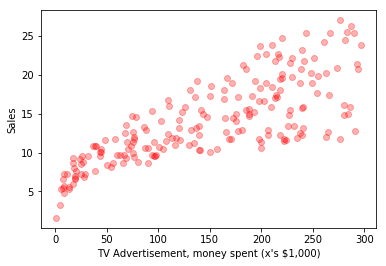

In [5]:
plt.plot(xdata, ydata, 'ro', alpha=0.3)
plt.xlabel('TV Advertisement, money spent (x\'s $1,000)')
plt.ylabel('Sales')

In [6]:
# run MLE calculation
result = minimize( fun     = LogLikelihood,      # function to minimize (linear model)
                   x0      = np.array([1,1]),    # initial guess for all parameters. 
                   method  = 'L-BFGS-B',         # method of solver. 
                   args    = (xdata, ydata))     # extra arguments to pass to the function. 
                                                 # Ours are x an y values.  

result  # Loglikelihood = -1*fun  

      fun: 519.0456637682424
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.13686838e-05, -8.07176548e-04])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 129
      nit: 23
   status: 0
  success: True
        x: array([7.03259841, 0.04753661])